In [58]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset
dataset = pd.read_csv('in_cart_customer.csv')
dataset.head()

,user_id,gender,age,income,customer score
0,1,Male,55,112000,11
1,3,Male,68,70000,13
2,5,Female,58,51000,5
3,8,Female,62,71000,4
4,12,Female,40,71000,6


In [90]:
# Creating matrix of feature. Dropping Age and Gender as its not much important for the analysis. 

X = dataset.iloc[:, [3,4]].values

X

array([[112000,     11],
       [ 70000,     13],
       [ 51000,      5],
       ...,
       [ 73000,      5],
       [ 50000,      5],
       [ 82000,      8]])

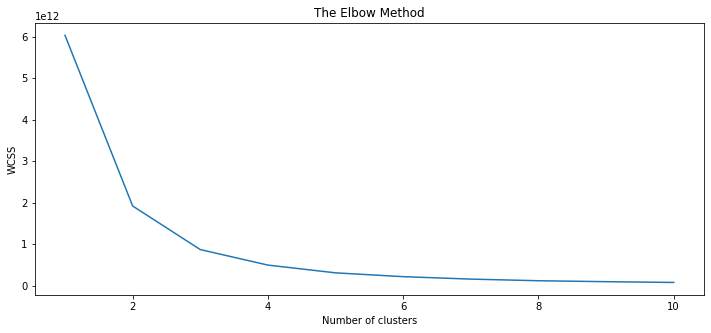

In [91]:

# -------------K-Mean Clustering:------------------

# Since in K-Mean clustering we have to assign the number of centroid by own which 
# may give wrong clusters in result so we will use advanced version of k-mean i.e., K-Means++
# which will do automatic assignment.
# One more problem is that we have to find about how many cluster we want to create to the algorithm which
# is not known to us so, we will use Elbow method to find number of clusters required visually.

# Using the elbow method to find the optimal number of clusters

%matplotlib inline
plt.rcParams['figure.figsize']=(12,5)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### From the chart above we can see that the elbow curve suggests 3 clusters

In [94]:
# Applying K-Means


kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

pd.DataFrame(y_kmeans).head()

,0
0,1
1,4
2,0
3,4
4,4


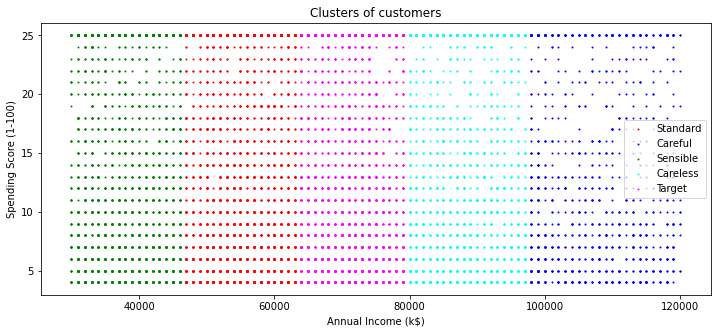

In [95]:
# So, WE have got our 5 clusters into 5 different colors. 
# We can name our clusters into some sensible name such as shown below.


plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 1, c = 'red', label = 'Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 1, c = 'blue', label = 'Careful')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 1, c = 'green', label = 'Sensible')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 1, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 1, c = 'magenta', label = 'Target')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [96]:
#We will need to bin customer score in order to create a more accurate picture

dataset.loc[dataset['customer score'] > 25, 'customer score'] = 25
dataset.head()

,user_id,gender,age,income,customer score
0,1,Male,55,112000,11
1,3,Male,68,70000,13
2,5,Female,58,51000,5
3,8,Female,62,71000,4
4,12,Female,40,71000,6


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


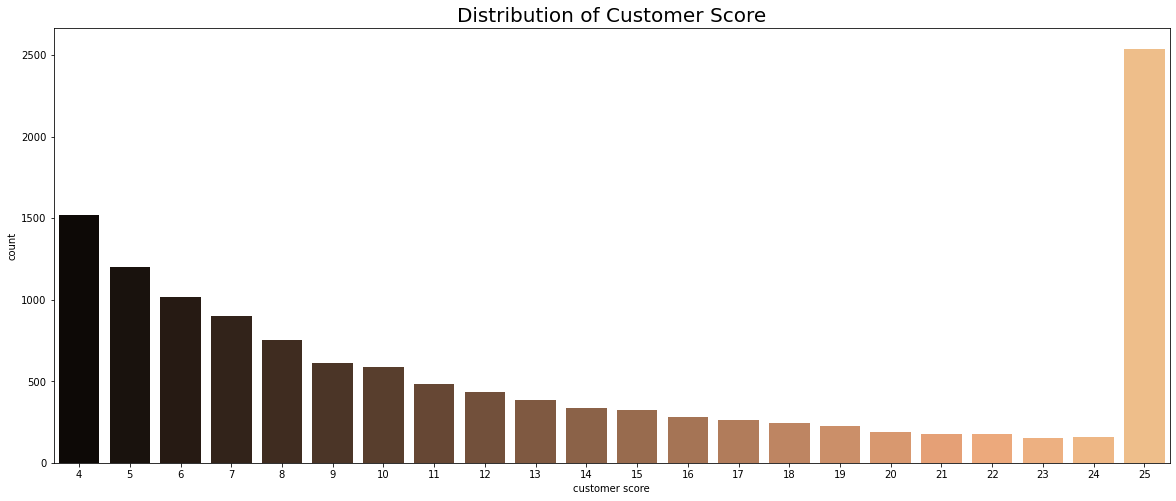

In [97]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(dataset['customer score'], palette = 'copper')
plt.title('Distribution of Customer Score', fontsize = 20)
plt.show()

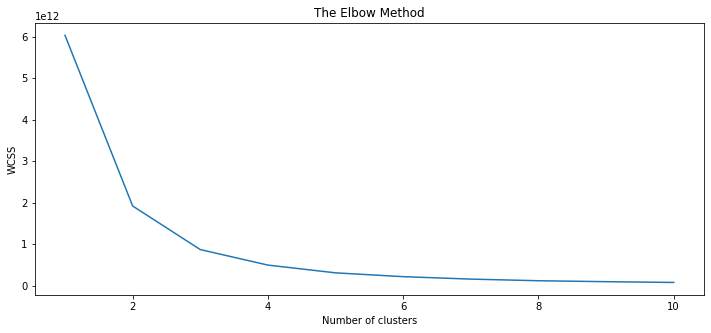

In [98]:
# -------------K-Mean Clustering:------------------

# Since in K-Mean clustering we have to assign the number of centroid by own which 
# may give wrong clusters in result so we will use advanced version of k-mean i.e., K-Means++
# which will do automatic assignment.
# One more problem is that we have to find about how many cluster we want to create to the algorithm which
# is not known to us so, we will use Elbow method to find number of clusters required visually.

# Using the elbow method to find the optimal number of clusters

%matplotlib inline
plt.rcParams['figure.figsize']=(12,5)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [99]:
dataset.describe()

,user_id,age,income,customer score
count,12950.000000,12950.000000,12950.000000,12950.000000
mean,7423.445869,54.393359,65329.266409,12.872355
std,4274.906366,17.395372,21583.713051,7.736739
min,1.000000,18.000000,30000.000000,4.000000
25%,3744.250000,42.000000,49000.000000,6.000000
50%,7392.500000,55.000000,63000.000000,10.000000
75%,11128.750000,67.000000,79000.000000,20.000000
max,14824.000000,101.000000,120000.000000,25.000000


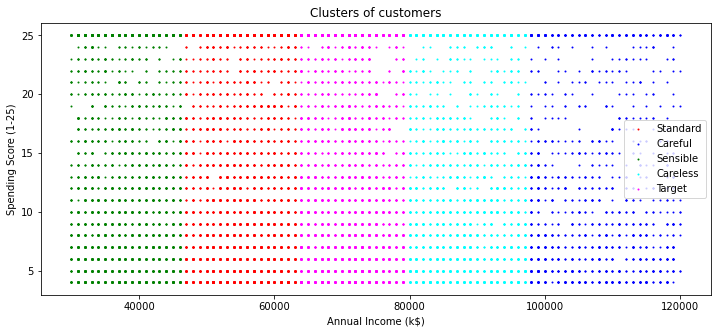

In [100]:

# So, WE have got our 5 clusters into 5 different colors. 
# We can name our clusters into some sensible name such as shown below.


plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 1, c = 'red', label = 'Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 1, c = 'blue', label = 'Careful')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 1, c = 'green', label = 'Sensible')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 1, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 1, c = 'magenta', label = 'Target')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-25)')
plt.legend()
plt.show()

After trying this study in a number of ways I will need to go back and create bins for customer score and possibly income